# 1. Import Dependencies

In [1]:
!pip install underthesea nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 65.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import warnings
from underthesea import lang_detect
import re
import matplotlib.pyplot as plt
import random
print('imported')

imported


In [3]:
warnings.filterwarnings('ignore')
input_path = "/kaggle/input/courses-recommend/"
excel_file_path = "De xuat khoa hoc - courses.xlsx"

# 2. User Data

In [4]:
# Mở tệp Excel
workbook = openpyxl.load_workbook(input_path+excel_file_path)

# Chọn sheet cần đọc
sheet = workbook['Nhân viên A']

In [5]:
df_user_information = pd.DataFrame({sheet['A7'].value.replace(':',''): [sheet['B7'].value],
        sheet['C7'].value.replace(':',''): [sheet['D7'].value],
       sheet['A8'].value.replace(':',''): [sheet['B8'].value],
       sheet['C8'].value.replace(':',''): [sheet['D8'].value],
       sheet['A9'].value.replace(':',''): [sheet['B9'].value],
       sheet['C9'].value.replace(':',''): [sheet['D9'].value],
       sheet['A11'].value.replace(':',''): [sheet['B11'].value],
       sheet['C11'].value.replace(':',''): [sheet['D11'].value],
       sheet['A13'].value.replace(':',''): [sheet['B13'].value],
       sheet['A14'].value.replace(':',''): [sheet['B14'].value]})
df_user_information

,Mã NV,Công ty,Họ và tên,Bộ phận,Giới tính,Nơi làm việc,Nơi sinh,Chức danh,Email,Mobile
0,12455475.0,<FPT Telecom>,Nguyễn Thị C,Ban Chất lượng,Nữ,TP. Hồ Chí Minh,Bình Dương,Phó phòng,C@fpt.com,968345678.0


In [6]:
df_user_level =  pd.DataFrame({sheet['A26'].value: [sheet['A27'].value],
        sheet['B26'].value: [sheet['B27'].value],
       sheet['C26'].value: [sheet['C27'].value],
       sheet['D26'].value: [sheet['D27'].value],
       sheet['E26'].value: [sheet['E27'].value],
       sheet['F26'].value: [sheet['F27'].value]})
df_user_level

,Tên trường,Chuyên ngành học,Hệ đào tạo,Năm tốt nghiệp,Xếp loại tốt nghiệp,Ghi chú
0,Đại học Luật Hồ Chí Minh,Pháp Chế,Cử nhân Đại học,2010.0,Giỏi,None


In [7]:
arr1=[]
arr2=[]
arr3=[]
arr4=[]

for row in range(68, 76):
    arr1.append(sheet.cell(row=row, column=1).value)
    arr2.append(sheet.cell(row=row, column=2).value)
    arr3.append(sheet.cell(row=row, column=3).value)
    arr4.append(sheet.cell(row=row, column=4).value)
df_user_training = pd.DataFrame({sheet['A67'].value:arr1,sheet['B67'].value:arr2,sheet['C67'].value:arr3,sheet['D67'].value:arr4})
df_user_training

,Từ ngày – Đến ngày,Tên khóa học,Hình thức khóa học,Kết quả
0,2017-12-20,Kỹ năng bán hàng bằng câu chuyện,Online,Hoàn thành
1,2019-12-20,An toàn lao động,Online,Hoàn thành
2,2020-12-20,Hệ thống Call center cơ bản,Đợt thi,Hoàn thành
3,2021-12-20,Phương pháp bán hàng hiệu quả,Online,Hoàn thành
4,2014-12-20,Thi nâng bậc 2 HTKT,Đợt thi,Hoàn thành
5,2019-12-20,Thi nâng bậc 3 HTKT,Đợt thi,Hoàn thành
6,2023-12-20,FTI_Giải pháp Base.vn,Online,Hoàn thành
7,2022-12-20,Box FPT Play 2022 và iZiOS,Online,Chưa hoàn thành


In [8]:
arr1=[]
arr2=[]
arr3=[]
arr4=[]

for row in range(79, 87):
    arr1.append(sheet.cell(row=row, column=1).value)
    arr2.append(sheet.cell(row=row, column=2).value)
    arr3.append(sheet.cell(row=row, column=3).value)
    arr4.append(sheet.cell(row=row, column=4).value)
df_user_certificate = pd.DataFrame({sheet['A78'].value.replace('/',' '):arr1,
                                 sheet['B78'].value:arr2,
                                 sheet['C78'].value:arr3,
                                 sheet['D78'].value.replace('/',' '):arr4})
df_user_certificate

,Kiến thức kỹ năng được cấp chứng chỉ,"Nơi đào tạo/Tổ chức cấp chứng chỉ,…",Năm cấp,Xếp loại Điểm
0,Kỹ năng bán hàng bằng câu chuyện,Trung tâm Đào tạo,2017.0,Giỏi
1,Trọn bộ bí quyết quảng cáo google ads,Trung tâm Đào tạo,2018.0,Xuất sắc
2,Kỹ năng thiết kế cơ bản,Trung tâm Đào tạo,2019.0,Xuất sắc
3,Kiến thức về các nghiệp vụ chuyên môn về bán hàng,FCU,2022.0,Giỏi
4,Kiến thức về kỹ thuật cơ bản,FCU,2022.0,Giỏi
5,Kỹ năng thuyết trình cơ bản,Coursera,2023.0,None
6,Cách thu hồi email đã gửi,Udemy,2023.0,None
7,3 lợi ích của phương pháp đào tạo OJT,Udemy,2023.0,None


In [9]:
df_user_training['Tên khóa học'] = df_user_training['Tên khóa học'].str.replace(r'[^\w\s]', '', regex=True).str.strip()
df_user_certificate['Kiến thức kỹ năng được cấp chứng chỉ'] = df_user_certificate['Kiến thức kỹ năng được cấp chứng chỉ'].str.replace(r'[^\w\s]', '', regex=True).str.strip()
df_user_information['Bộ phận'] = df_user_information['Bộ phận'].str.replace(r'[^\w\s]', '', regex=True).str.replace('ban ','').str.strip()


training_data = [item.lower() for item in df_user_training['Tên khóa học'].tolist()]
certificate_data = [item.lower() for item in df_user_certificate['Kiến thức kỹ năng được cấp chứng chỉ'].tolist()]
information_data = [item.lower() for item in df_user_information['Bộ phận'].tolist()]



user_data = list(certificate_data+training_data+information_data)

In [10]:
user_data

['kỹ năng bán hàng bằng câu chuyện',
 'trọn bộ bí quyết quảng cáo google ads',
 'kỹ năng thiết kế cơ bản',
 'kiến thức về các nghiệp vụ chuyên môn về bán hàng',
 'kiến thức về kỹ thuật cơ bản',
 'kỹ năng thuyết trình cơ bản',
 'cách thu hồi email đã gửi',
 '3 lợi ích của phương pháp đào tạo ojt',
 'kỹ năng bán hàng bằng câu chuyện',
 'an toàn lao động',
 'hệ thống call center cơ bản',
 'phương pháp bán hàng hiệu quả',
 'thi nâng bậc 2 htkt',
 'thi nâng bậc 3 htkt',
 'fti_giải pháp basevn',
 'box fpt play 2022 và izios',
 'ban chất lượng']

In [11]:
query = " ".join(user_data)

In [12]:
query = re.sub(r'[^\w\s]', '', query)
query = re.sub(r'[\n\r]', '',query).strip()
query= query.replace('.', '').replace('_', ' ')
query = query.lower()

In [13]:
query

'kỹ năng bán hàng bằng câu chuyện trọn bộ bí quyết quảng cáo google ads kỹ năng thiết kế cơ bản kiến thức về các nghiệp vụ chuyên môn về bán hàng kiến thức về kỹ thuật cơ bản kỹ năng thuyết trình cơ bản cách thu hồi email đã gửi 3 lợi ích của phương pháp đào tạo ojt kỹ năng bán hàng bằng câu chuyện an toàn lao động hệ thống call center cơ bản phương pháp bán hàng hiệu quả thi nâng bậc 2 htkt thi nâng bậc 3 htkt fti giải pháp basevn box fpt play 2022 và izios ban chất lượng'

# 3. Courses Data

In [14]:
df_courses = pd.read_excel(input_path+excel_file_path, sheet_name='Danh sách khóa học', skiprows=[0, 1])
df_courses.head(5)

,STT,Khối,Mảng,Tên khóa học,Thời lượng khóa học,Trang cung cấp,Link khóa học,Link bài thi miễn phí trên FPT Elearning,Nội dung khóa học,Tiếng Việt
0,1,Đảm bảo,Đảm bảo chất lượng,Innovation Management,11.0,Coursera,https://www.coursera.org/learn/innovation-mana...,https://daotao.fpt.com.vn/Course/Courseinfo?Co...,"Các khái niệm quản lý đổi mới, các lý thuyết t...",Đã có sub tiếng Việt
1,2,Đảm bảo,Đảm bảo chất lượng,Statistical Process Control (SPC) Using Micros...,11.0,Udemy,https://fpt.udemy.com/course/statistical-proce...,NaN,"Cách khai thác, phân tích và báo cáo dữ liệu q...",AI dịch
2,3,Đảm bảo,Đảm bảo chất lượng,Hệ thống quản trị FPT,0.5,FCU,https://daotao.fpt.com.vn/Course/Courseinfo?Co...,NaN,- Kiến thức về Hệ thống quản trị FPT\n - Phư...,Khóa học bằng Tiếng Việt
3,4,Đảm bảo,Đảm bảo chất lượng,Mastering the Seven Quality Tools (with Micros...,4.5,Udemy,https://fpt.udemy.com/course/intro-to-quality-...,NaN,"Nền tảng cho phân tích nguyên nhân gốc rễ, gi...",AI dịch
4,5,Đảm bảo,Đảm bảo chất lượng,Root Cause Analysis and the 8D Corrective Acti...,10.0,Udemy,https://fpt.udemy.com/course/root-cause-analys...,https://daotao.fpt.com.vn/Course/Courseinfo?Co...,- Mối liên hệ giữa hệ thống truy xuất nguồn gố...,AI dịch


In [15]:
df_courses.shape

(350, 10)

## 3.1 Data Analysis

In [16]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STT                                       350 non-null    int64  
 1   Khối                                      350 non-null    object 
 2   Mảng                                      350 non-null    object 
 3   Tên khóa học                              350 non-null    object 
 4   Thời lượng khóa học                       350 non-null    float64
 5   Trang cung cấp                            350 non-null    object 
 6   Link khóa học                             350 non-null    object 
 7   Link bài thi miễn phí trên FPT Elearning  90 non-null     object 
 8   Nội dung khóa học                         341 non-null    object 
 9   Tiếng Việt                                350 non-null    object 
dtypes: float64(1), int64(1), object(8)
mem

In [17]:
def visual_barhis(counts,name):
    # Tạo dữ liệu cho biểu đồ
    labels = list(counts.keys())
    values = list(counts.values())
    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(labels))]
    # Tạo biểu đồ cột
    fig, ax = plt.subplots(figsize=(8, 6))
    bars =ax.bar(labels, values, color=colors)

    # Thêm các nhãn và tiêu đề
    ax.set_xticklabels(labels, rotation=45, ha='right') 
    ax.set_xlabel(name)
    ax.set_ylabel('Số lượng')
    ax.set_title(f'Biểu đồ số lượng theo{name}')
    # Thêm số lượng lên mỗi cột
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # va='bottom' đặt nhãn trên đỉnh cột
    # Hiển thị biểu đồ
    plt.show()
def visual_circlehis(counts,name):
        # Tạo dữ liệu cho biểu đồ
    labels = list(counts.keys())
    values = list(counts.values())
    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(labels))]
    
    # Tạo biểu đồ tròn
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(values, colors=colors, startangle=140, autopct='%1.1f%%')
    
    # Thêm các nhãn và tiêu đề
    ax.set_title(f'Biểu đồ tròn: Số lượng theo{name}')
    
    # Tạo kiểu chữ nghiêng cho các giá trị phần trăm
    for autotext in autotexts:
        autotext.set_fontstyle('italic')
    
    # Thêm chú giải ở bên phải
    ax.legend(wedges, [f"{label} - {value}" for label, value in zip(labels, values)],
              title=name, loc="center left", bbox_to_anchor=(1, 0.5), fontsize='large', title_fontsize='x-large')
    
    # Hiển thị biểu đồ
    plt.show()

In [18]:
df_courses.isnull().sum()

STT                                           0
Khối                                          0
Mảng                                          0
Tên khóa học                                  0
Thời lượng khóa học                           0
Trang cung cấp                                0
Link khóa học                                 0
Link bài thi miễn phí trên FPT Elearning    260
Nội dung khóa học                             9
Tiếng Việt                                    0
dtype: int64

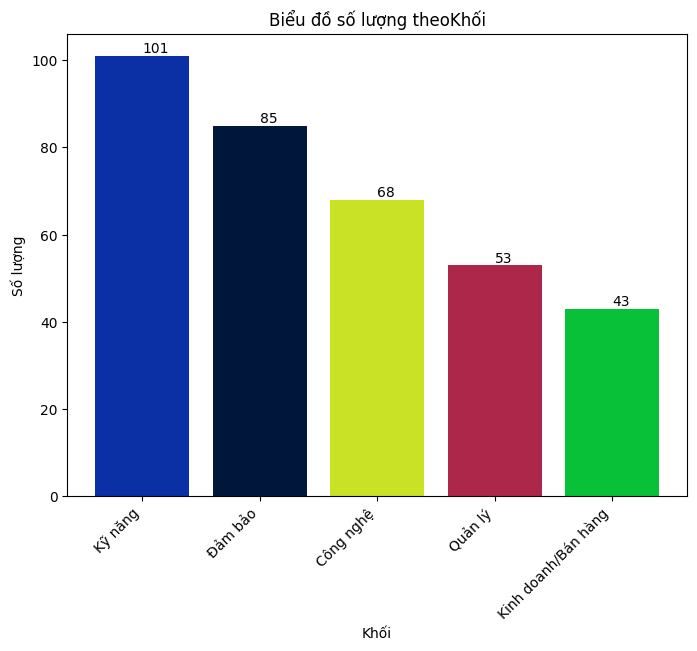

In [19]:
visual_barhis(dict(df_courses['Khối'].value_counts()), 'Khối')

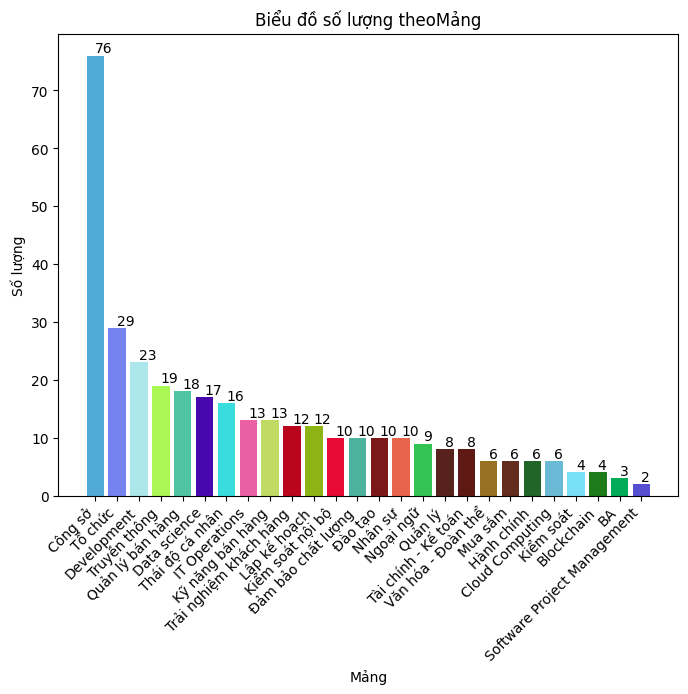

In [20]:
visual_barhis(dict(df_courses['Mảng'].value_counts()),'Mảng')

In [21]:
# hours
df_courses['Thời lượng khóa học'].value_counts()

Thời lượng khóa học
2.0     28
1.5     25
1.0     22
10.0    16
7.0     16
        ..
28.5     1
32.5     1
21.5     1
33.5     1
34.5     1
Name: count, Length: 62, dtype: int64

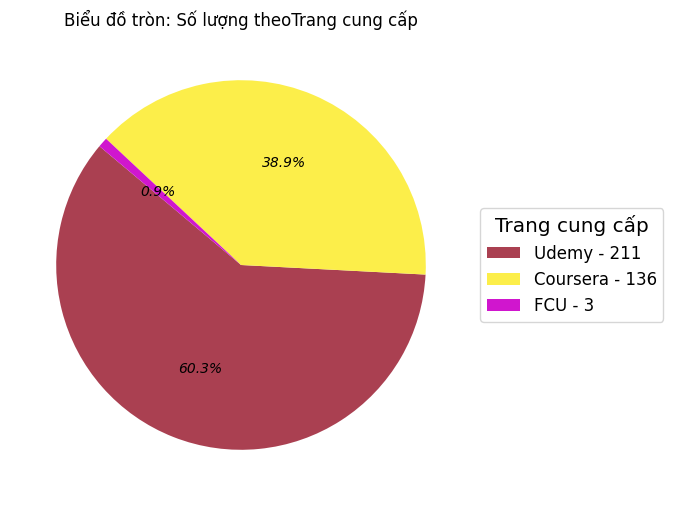

In [22]:
visual_circlehis(dict(df_courses['Trang cung cấp'].value_counts()),'Trang cung cấp')

In [23]:
# Nội dung bằng tiếng việt hay tiếng anh
# Ai dịch, Sub tiếng việt, KH Tiếng Việt, KH dịch -> Ngôn ngữ Tiếng Việt
# Chưa dịch -> Ngôn ngữ Tiếng Anh
df_courses['Tiếng Việt'].value_counts()

Tiếng Việt
AI dịch                     211
Đã có sub tiếng Việt         86
KH dịch 2023                 28
Chưa dịch                    22
Khóa học bằng Tiếng Việt      3
Name: count, dtype: int64

In [24]:
df_courses['Tên khóa học']

0                                  Innovation Management
1      Statistical Process Control (SPC) Using Micros...
2                                  Hệ thống quản trị FPT
3      Mastering the Seven Quality Tools (with Micros...
4      Root Cause Analysis and the 8D Corrective Acti...
                             ...                        
345              Operating Systems from scratch - Part 1
346                          Process Capability Analysis
347    Manufacturing Process - Becoming an Injection ...
348         Agile Fundamentals: Including Scrum & Kanban
349    Agile Crash Course: Agile Project Management; ...
Name: Tên khóa học, Length: 350, dtype: object

In [25]:
df_courses['Tên khóa học'][df_courses['Mảng'] == 'Data science']
# df_courses.loc[df_courses['STT']==113,'Tên khóa học'].values[0]

295    Artificial Intelligence A-Z™: Learn How To Bui...
296    10 Days of No Code Artificial Intelligence Boo...
297                  Artificial Intelligence Masterclass
298      Python Project for AI & Application Development
299                         Managing Big Data with MySQL
300    The Data Science Course 2023: Complete Data Sc...
301    Microsoft Power BI - A Complete Introduction [...
302                       Hadoop Developer In Real World
303    Apache Kafka Series - Kafka Streams for Data P...
304                          Apache Cassandra in 2 hours
305        Python Data Analysis & Visualization Bootcamp
306                                              Grafana
307    Machine Learning Foundations for Product Managers
308    Machine Learning Foundations: A Case Study App...
309    Machine Learning A-Z: AI, Python & R + ChatGPT...
310                    Neural Networks and Deep Learning
311                                Statistical Inference
Name: Tên khóa học, dtype: obje

## 3.2 Data Preprocessing

In [26]:
data_courses = df_courses[['STT','Khối','Mảng','Tên khóa học','Thời lượng khóa học','Nội dung khóa học']]

In [27]:
data_courses.head(5)

,STT,Khối,Mảng,Tên khóa học,Thời lượng khóa học,Nội dung khóa học
0,1,Đảm bảo,Đảm bảo chất lượng,Innovation Management,11.0,"Các khái niệm quản lý đổi mới, các lý thuyết t..."
1,2,Đảm bảo,Đảm bảo chất lượng,Statistical Process Control (SPC) Using Micros...,11.0,"Cách khai thác, phân tích và báo cáo dữ liệu q..."
2,3,Đảm bảo,Đảm bảo chất lượng,Hệ thống quản trị FPT,0.5,- Kiến thức về Hệ thống quản trị FPT\n - Phư...
3,4,Đảm bảo,Đảm bảo chất lượng,Mastering the Seven Quality Tools (with Micros...,4.5,"Nền tảng cho phân tích nguyên nhân gốc rễ, gi..."
4,5,Đảm bảo,Đảm bảo chất lượng,Root Cause Analysis and the 8D Corrective Acti...,10.0,- Mối liên hệ giữa hệ thống truy xuất nguồn gố...


In [28]:
data_courses['Khối'] = data_courses['Khối'].str.replace(r'[^\w\s]', '', regex=True)
data_courses['Mảng'] = data_courses['Mảng'].str.replace(r'[^\w\s]', '', regex=True)
data_courses['Tên khóa học xử lý'] = data_courses['Tên khóa học'].str.replace(r'[^\w\s]', '', regex=True).str.strip()
data_courses['Nội dung khóa học'] = data_courses['Nội dung khóa học'].str.replace(r'[^\w\s]', '', regex=True)
data_courses['Nội dung khóa học'] = data_courses['Nội dung khóa học'].str.replace(r'[\n\r]', '', regex=True).str.strip()

In [29]:
data_courses.head(5)

,STT,Khối,Mảng,Tên khóa học,Thời lượng khóa học,Nội dung khóa học,Tên khóa học xử lý
0,1,Đảm bảo,Đảm bảo chất lượng,Innovation Management,11.0,Các khái niệm quản lý đổi mới các lý thuyết tạ...,Innovation Management
1,2,Đảm bảo,Đảm bảo chất lượng,Statistical Process Control (SPC) Using Micros...,11.0,Cách khai thác phân tích và báo cáo dữ liệu qu...,Statistical Process Control SPC Using Microsof...
2,3,Đảm bảo,Đảm bảo chất lượng,Hệ thống quản trị FPT,0.5,Kiến thức về Hệ thống quản trị FPT Phương th...,Hệ thống quản trị FPT
3,4,Đảm bảo,Đảm bảo chất lượng,Mastering the Seven Quality Tools (with Micros...,4.5,Nền tảng cho phân tích nguyên nhân gốc rễ giả...,Mastering the Seven Quality Tools with Microso...
4,5,Đảm bảo,Đảm bảo chất lượng,Root Cause Analysis and the 8D Corrective Acti...,10.0,Mối liên hệ giữa hệ thống truy xuất nguồn gốc ...,Root Cause Analysis and the 8D Corrective Acti...


In [30]:
data_courses['Nội dung khóa học'] = data_courses['Nội dung khóa học'].fillna('')

In [31]:
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STT                  350 non-null    int64  
 1   Khối                 350 non-null    object 
 2   Mảng                 350 non-null    object 
 3   Tên khóa học         350 non-null    object 
 4   Thời lượng khóa học  350 non-null    float64
 5   Nội dung khóa học    350 non-null    object 
 6   Tên khóa học xử lý   350 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.3+ KB


## 3.3 Data Featuring

In [32]:
# data_courses['Ngôn ngữ'] = data_courses['Tiếng Việt'].apply(lambda x: 'Tiếng Anh' if x == 'Chưa dịch' else 'Tiếng Việt')

In [33]:
# data_courses['Ngôn ngữ'].value_counts()

## 3.4 Translate

In [34]:
tokenizer_en2vi = AutoTokenizer.from_pretrained("vinai/vinai-translate-en2vi-v2", src_lang="en_XX")
model_en2vi = AutoModelForSeq2SeqLM.from_pretrained("vinai/vinai-translate-en2vi-v2")
device_en2vi = torch.device("cuda")
model_en2vi.to(device_en2vi)

def translate_en2vi(en_texts: str) -> str:
    input_ids = tokenizer_en2vi(en_texts, padding=True, return_tensors="pt").to(device_en2vi)
    output_ids = model_en2vi.generate(
        **input_ids,
        decoder_start_token_id=tokenizer_en2vi.lang_code_to_id["vi_VN"],
        num_return_sequences=1,
        num_beams=5,
        early_stopping=True
    )
    vi_text = tokenizer_en2vi.batch_decode(output_ids, skip_special_tokens=True)
    vi_text = " ".join(vi_text)
    return vi_text


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [35]:
data_courses['language'] = data_courses['Tên khóa học xử lý'].apply(lambda x: lang_detect(x))
data_courses['Tên khóa học dịch'] = data_courses.apply(
    lambda row: translate_en2vi(row['Tên khóa học xử lý']) if row['language'] != 'vi' else row['Tên khóa học xử lý'], axis=1)


data_courses['language'] = data_courses['Nội dung khóa học'].apply(lambda x: lang_detect(x))
data_courses['Nội dung khóa học dịch'] = data_courses.apply(
    lambda row: translate_en2vi(row['Nội dung khóa học']) if row['language'] != 'vi' else row['Nội dung khóa học'], axis=1)

2024-07-16 01:11:26,754 https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin not found in cache, downloading to /tmp/tmpx02cw1g8


100%|██████████| 131266198/131266198 [00:02<00:00, 49124832.19B/s]

2024-07-16 01:11:29,501 copying /tmp/tmpx02cw1g8 to cache at /root/.underthesea/models/lid.176.bin
2024-07-16 01:11:29,616 removing temp file /tmp/tmpx02cw1g8


In [36]:
data_courses.head(5)

,STT,Khối,Mảng,Tên khóa học,Thời lượng khóa học,Nội dung khóa học,Tên khóa học xử lý,language,Tên khóa học dịch,Nội dung khóa học dịch
0,1,Đảm bảo,Đảm bảo chất lượng,Innovation Management,11.0,Các khái niệm quản lý đổi mới các lý thuyết tạ...,Innovation Management,vi,Quản lý đổi mới,Các khái niệm quản lý đổi mới các lý thuyết tạ...
1,2,Đảm bảo,Đảm bảo chất lượng,Statistical Process Control (SPC) Using Micros...,11.0,Cách khai thác phân tích và báo cáo dữ liệu qu...,Statistical Process Control SPC Using Microsof...,vi,Kiểm soát quy trình thống kê SPC Sử dụng Micro...,Cách khai thác phân tích và báo cáo dữ liệu qu...
2,3,Đảm bảo,Đảm bảo chất lượng,Hệ thống quản trị FPT,0.5,Kiến thức về Hệ thống quản trị FPT Phương th...,Hệ thống quản trị FPT,vi,Hệ thống quản trị FPT,Kiến thức về Hệ thống quản trị FPT Phương th...
3,4,Đảm bảo,Đảm bảo chất lượng,Mastering the Seven Quality Tools (with Micros...,4.5,Nền tảng cho phân tích nguyên nhân gốc rễ giả...,Mastering the Seven Quality Tools with Microso...,vi,Làm chủ Bảy Công cụ Chất lượng với Microsoft E...,Nền tảng cho phân tích nguyên nhân gốc rễ giả...
4,5,Đảm bảo,Đảm bảo chất lượng,Root Cause Analysis and the 8D Corrective Acti...,10.0,Mối liên hệ giữa hệ thống truy xuất nguồn gốc ...,Root Cause Analysis and the 8D Corrective Acti...,vi,Phân tích nguyên nhân gốc rễ và quy trình hành...,Mối liên hệ giữa hệ thống truy xuất nguồn gốc ...


## 3.5 Tags feature

In [37]:
data_courses['tags'] = data_courses['Tên khóa học dịch'].str.cat(
    [data_courses['Nội dung khóa học dịch'],
     data_courses['Khối'],data_courses['Mảng']], sep=' ')


In [38]:
data_courses.head(5)

,STT,Khối,Mảng,Tên khóa học,Thời lượng khóa học,Nội dung khóa học,Tên khóa học xử lý,language,Tên khóa học dịch,Nội dung khóa học dịch,tags
0,1,Đảm bảo,Đảm bảo chất lượng,Innovation Management,11.0,Các khái niệm quản lý đổi mới các lý thuyết tạ...,Innovation Management,vi,Quản lý đổi mới,Các khái niệm quản lý đổi mới các lý thuyết tạ...,Quản lý đổi mới Các khái niệm quản lý đổi mới ...
1,2,Đảm bảo,Đảm bảo chất lượng,Statistical Process Control (SPC) Using Micros...,11.0,Cách khai thác phân tích và báo cáo dữ liệu qu...,Statistical Process Control SPC Using Microsof...,vi,Kiểm soát quy trình thống kê SPC Sử dụng Micro...,Cách khai thác phân tích và báo cáo dữ liệu qu...,Kiểm soát quy trình thống kê SPC Sử dụng Micro...
2,3,Đảm bảo,Đảm bảo chất lượng,Hệ thống quản trị FPT,0.5,Kiến thức về Hệ thống quản trị FPT Phương th...,Hệ thống quản trị FPT,vi,Hệ thống quản trị FPT,Kiến thức về Hệ thống quản trị FPT Phương th...,Hệ thống quản trị FPT Kiến thức về Hệ thống qu...
3,4,Đảm bảo,Đảm bảo chất lượng,Mastering the Seven Quality Tools (with Micros...,4.5,Nền tảng cho phân tích nguyên nhân gốc rễ giả...,Mastering the Seven Quality Tools with Microso...,vi,Làm chủ Bảy Công cụ Chất lượng với Microsoft E...,Nền tảng cho phân tích nguyên nhân gốc rễ giả...,Làm chủ Bảy Công cụ Chất lượng với Microsoft E...
4,5,Đảm bảo,Đảm bảo chất lượng,Root Cause Analysis and the 8D Corrective Acti...,10.0,Mối liên hệ giữa hệ thống truy xuất nguồn gốc ...,Root Cause Analysis and the 8D Corrective Acti...,vi,Phân tích nguyên nhân gốc rễ và quy trình hành...,Mối liên hệ giữa hệ thống truy xuất nguồn gốc ...,Phân tích nguyên nhân gốc rễ và quy trình hành...


In [39]:
data_courses['tags'].iloc[1]

'Kiểm soát quy trình thống kê SPC Sử dụng Microsoft Excel Cách khai thác phân tích và báo cáo dữ liệu quy trình sản xuất của mình theo cách thúc đẩy cải tiến trong tổ chức của bạn Bao gồm 4 nội dung chính  Thống kê cơ bản Phân tích Pareto Biểu đồ kiểm soát Phân tích hồi quy Đảm bảo Đảm bảo chất lượng'

## 3.6 Dataframe to be used

In [40]:
courses_df = data_courses[['STT','Tên khóa học','Tên khóa học dịch','tags']]
courses_df.rename(columns = {'Tên khóa học':'course_name'}, inplace = True)
courses_df.rename(columns = {'Tên khóa học dịch':'course_name_tran'}, inplace = True)
courses_df['course_name_tran'] = courses_df['course_name_tran'].apply(lambda x:re.sub(r'\s+', ' ', x.lower()) )
courses_df['tags'] = courses_df['tags'].apply(lambda x: re.sub(r'\s+', ' ', x.lower()) )

In [41]:
courses_df.head(5)

,STT,course_name,course_name_tran,tags
0,1,Innovation Management,quản lý đổi mới,quản lý đổi mới các khái niệm quản lý đổi mới ...
1,2,Statistical Process Control (SPC) Using Micros...,kiểm soát quy trình thống kê spc sử dụng micro...,kiểm soát quy trình thống kê spc sử dụng micro...
2,3,Hệ thống quản trị FPT,hệ thống quản trị fpt,hệ thống quản trị fpt kiến thức về hệ thống qu...
3,4,Mastering the Seven Quality Tools (with Micros...,làm chủ bảy công cụ chất lượng với microsoft e...,làm chủ bảy công cụ chất lượng với microsoft e...
4,5,Root Cause Analysis and the 8D Corrective Acti...,phân tích nguyên nhân gốc rễ và quy trình hành...,phân tích nguyên nhân gốc rễ và quy trình hành...


In [42]:
courses_df.shape

(350, 4)

In [43]:
# courses_df['course_name'][courses_df['STT']==1]215
courses_df.loc[courses_df['STT'] == 1, 'course_name'].values[0]

'Innovation Management'

# 4. Solution

In [44]:
from underthesea import word_tokenize, pos_tag, text_normalize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from itertools import permutations
from sklearn.metrics.pairwise import cosine_similarity
import requests
import nltk
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

In [45]:
url = "https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt"
response = requests.get(url)
vietnamese_stopwords = response.text.splitlines()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 4.1 Prepare input data

In [46]:
query

'kỹ năng bán hàng bằng câu chuyện trọn bộ bí quyết quảng cáo google ads kỹ năng thiết kế cơ bản kiến thức về các nghiệp vụ chuyên môn về bán hàng kiến thức về kỹ thuật cơ bản kỹ năng thuyết trình cơ bản cách thu hồi email đã gửi 3 lợi ích của phương pháp đào tạo ojt kỹ năng bán hàng bằng câu chuyện an toàn lao động hệ thống call center cơ bản phương pháp bán hàng hiệu quả thi nâng bậc 2 htkt thi nâng bậc 3 htkt fti giải pháp basevn box fpt play 2022 và izios ban chất lượng'

In [47]:
# Step 1: Stemming the input query words (Using text normalization for Vietnamese)
normalized_query = text_normalize(query)
stemmer = PorterStemmer()

In [48]:
# Step 2: Tokenize the normalized query
tokenized_query = word_tokenize(normalized_query, format="text")
stem_query= "".join([stemmer.stem(word) for word in tokenized_query])

# Lọc bỏ các danh từ riêng (kí hiệu 'Np' trong underthesea)
pos_tags = pos_tag(stem_query)
qs = " ".join([word for word, pos in pos_tags if pos == 'N' or pos=='V'])

# Step 3: Remove predefined common words (Stopwords for Vietnamese, english)
stopwords = set(vietnamese_stopwords+nltk.corpus.stopwords.words('english'))
# stopwords = set(nltk.corpus.stopwords.words('english'))
filtered_query = [word for word in word_tokenize(qs) if word not in stopwords and not re.search(r'\d', word)]

In [49]:
filtered_query = [q.replace('_',' ') for q in filtered_query]
filtered_query

['kỹ năng',
 'hàng',
 'câu chuyện bộ',
 'bí quyết',
 'quảng cáo',
 'google ads',
 'kỹ năng',
 'thiết kế',
 'cơ bản',
 'kiến thức',
 'nghiệp vụ',
 'chuyên môn',
 'hàng',
 'kiến thức',
 'kỹ thuật',
 'cơ bản',
 'kỹ năng',
 'thuyết trình',
 'cơ bản',
 'thu hồi',
 'email',
 'gửi',
 'lợi ích',
 'phương pháp',
 'đào tạo',
 'ojt',
 'kỹ năng',
 'hàng',
 'câu chuyện',
 'an toàn lao động',
 'hệ thống',
 'call',
 'center',
 'cơ bản',
 'phương pháp',
 'hàng',
 'hiệu quả',
 'thi',
 'nâng',
 'bậc',
 'htkt',
 'thi',
 'nâng',
 'bậc',
 'htkt',
 'fti',
 'giải pháp',
 'basevn',
 'box',
 'fpt',
 'play',
 'izios ban']

In [50]:
# Đếm số lần xuất hiện của mỗi từ
unique_keywords = sorted(list(set(filtered_query)), key=lambda x: len(x))
term_counts = {keyword: filtered_query.count(keyword) for keyword in unique_keywords}

# Sắp xếp từ theo số lần xuất hiện (giảm dần) và độ dài của từ (giảm dần)
sorted_terms = sorted(term_counts.items(), key=lambda x: (-x[1], -len(x[0])))

# Chuyển danh sách sorted_terms thành mảng với từ và số lần xuất hiện
sorted_keywords = [term for term, count in sorted_terms]

print("Keywords (sorted):", sorted_keywords)
print("Keywords Count (sorted):", sorted_terms)

Keywords (sorted): ['kỹ năng', 'cơ bản', 'hàng', 'phương pháp', 'kiến thức', 'nâng', 'htkt', 'thi', 'bậc', 'an toàn lao động', 'câu chuyện bộ', 'thuyết trình', 'chuyên môn', 'google ads', 'câu chuyện', 'quảng cáo', 'izios ban', 'nghiệp vụ', 'giải pháp', 'thiết kế', 'hiệu quả', 'hệ thống', 'bí quyết', 'kỹ thuật', 'thu hồi', 'đào tạo', 'lợi ích', 'basevn', 'center', 'email', 'call', 'play', 'fti', 'gửi', 'ojt', 'fpt', 'box']
Keywords Count (sorted): [('kỹ năng', 4), ('cơ bản', 4), ('hàng', 4), ('phương pháp', 2), ('kiến thức', 2), ('nâng', 2), ('htkt', 2), ('thi', 2), ('bậc', 2), ('an toàn lao động', 1), ('câu chuyện bộ', 1), ('thuyết trình', 1), ('chuyên môn', 1), ('google ads', 1), ('câu chuyện', 1), ('quảng cáo', 1), ('izios ban', 1), ('nghiệp vụ', 1), ('giải pháp', 1), ('thiết kế', 1), ('hiệu quả', 1), ('hệ thống', 1), ('bí quyết', 1), ('kỹ thuật', 1), ('thu hồi', 1), ('đào tạo', 1), ('lợi ích', 1), ('basevn', 1), ('center', 1), ('email', 1), ('call', 1), ('play', 1), ('fti', 1), ('g

In [51]:
# test_query=['python','dữ liệu','học máy','lập trình','học máy','lập trình']
#Step 5: Combine words using permutations to make N-Grams
n_grams = list(permutations(filtered_query, 2))  # Creating bigrams as an example

# Convert n-grams to strings
n_grams_strings = [" ".join(gram) for gram in n_grams]

In [52]:
# Prepare tags
courses_df['tags'] = courses_df['tags'].apply(lambda x: word_tokenize(text_normalize(x), format="text"))
courses_df['tags'] = courses_df['tags'].apply(lambda x: [word for word in word_tokenize(x) if word not in stopwords])
courses_df['tags'] = courses_df['tags'].apply(lambda x: " ".join(x).replace('_',' ') )

In [53]:
courses_df.head(5)

,STT,course_name,course_name_tran,tags
0,1,Innovation Management,quản lý đổi mới,quản lý đổi mới khái niệm quản lý đổi mới lý t...
1,2,Statistical Process Control (SPC) Using Micros...,kiểm soát quy trình thống kê spc sử dụng micro...,kiểm soát quy trình thống kê spc sử dụng micro...
2,3,Hệ thống quản trị FPT,hệ thống quản trị fpt,hệ thống quản trị fpt kiến thức hệ thống quản ...
3,4,Mastering the Seven Quality Tools (with Micros...,làm chủ bảy công cụ chất lượng với microsoft e...,chủ bảy công cụ chất lượng microsoft excel nền...
4,5,Root Cause Analysis and the 8D Corrective Acti...,phân tích nguyên nhân gốc rễ và quy trình hành...,phân tích nguyên nhân gốc rễ quy trình hành độ...


## 4.2 TFIDFVector + CosineSimilarity

In [58]:
# Step 6: Retrieve Courses and Apply Vectorizer to Remove Redundancy
def retrieve_courses(courses_df, queries):
    vectorizer = TfidfVectorizer(min_df=2, max_features=None,
                                 strip_accents='unicode',
                                 analyzer='word',
                                 ngram_range=(1, 3),stop_words ='english')   
    lsa = TruncatedSVD(n_components=50)
    matrix = vectorizer.fit_transform(courses_df['tags'].tolist())
    matrix_lsa = lsa.fit_transform(matrix)
    
    query_vectors = vectorizer.transform(queries)
    query_vectors_lsa = lsa.transform(query_vectors)
    
    similarities = cosine_similarity(query_vectors_lsa, matrix_lsa).flatten()
    related_courses = sorted(zip(courses_df['STT'].tolist(), similarities), key=lambda x: x[1], reverse=True)
    return related_courses

related_courses = retrieve_courses(courses_df, n_grams_strings)
#     vectorizer = CountVectorizer(min_df=3,strip_accents='unicode',
#                                  analyzer='word',
#                                  ngram_range=(1, 3),
#                                  max_features=None,
#                                  stop_words='english')
#     lsa = LatentDirichletAllocation(n_components=100, random_state=42)

In [59]:
# Step 7: Extract Related Courses Using Course Ontology
def find_related_courses(course_id, courses):
    for index, row in courses.iterrows():
        if course_id == row['STT']:
            return row
    return None

related_coures_result = []
# Display results

for course_id, score in related_courses[1:20]:
    if score <10:
        print(f"Course ID: {course_id}, Title: {courses_df.loc[courses_df['STT'] == course_id, 'course_name'].values[0]}, Similarity Score: {score:.2f}")
        print('-'*10)
        related = find_related_courses(course_id, courses_df)
        if not related.empty:
            related_coures_result.append(related)
print('----')
for c in related_coures_result:
    print(c['course_name'])

Course ID: 90, Title: Connecting with Sales Prospects, Similarity Score: 0.87
----------
Course ID: 95, Title: Business to Business Selling Skills, Similarity Score: 0.86
----------
Course ID: 94, Title: Sales Training: How To Close More Sales, Similarity Score: 0.85
----------
Course ID: 92, Title: Sales Pitch and Closing, Similarity Score: 0.82
----------
Course ID: 98, Title: Effective Sales – An Overview, Similarity Score: 0.81
----------
Course ID: 86, Title: Sales Skills & Negotiation Skills - Selling Masterclass 2022, Similarity Score: 0.81
----------
Course ID: 88, Title: Sales Skills Training: Consultative Selling Master Class, Similarity Score: 0.80
----------
Course ID: 89, Title: Sales Training: Practical Sales Techniques, Similarity Score: 0.80
----------
Course ID: 93, Title: Sales Training: Techniques for a Human-Centric Sales Process, Similarity Score: 0.77
----------
Course ID: 97, Title: SELF-CONFIDENCE: 40-minute Confidence & Self Esteem Guide, Similarity Score: 0.74